<a href="https://colab.research.google.com/github/koala1605/Brainwave_Matrix_Intern/blob/main/Another_copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-95f3034901d3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Sentiment"] = df_filtered["Description"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


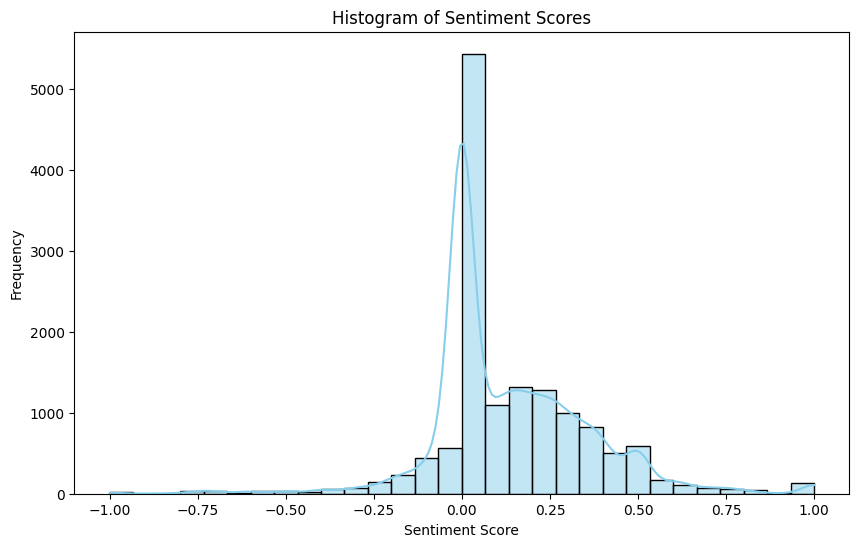

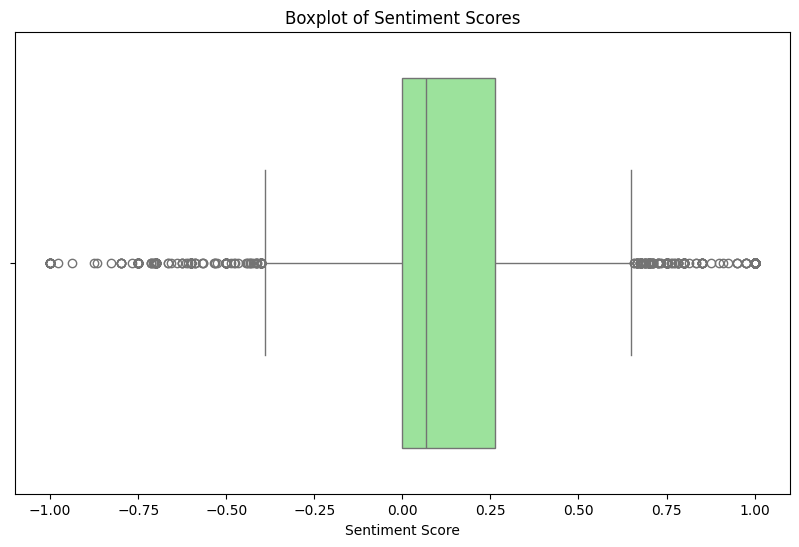

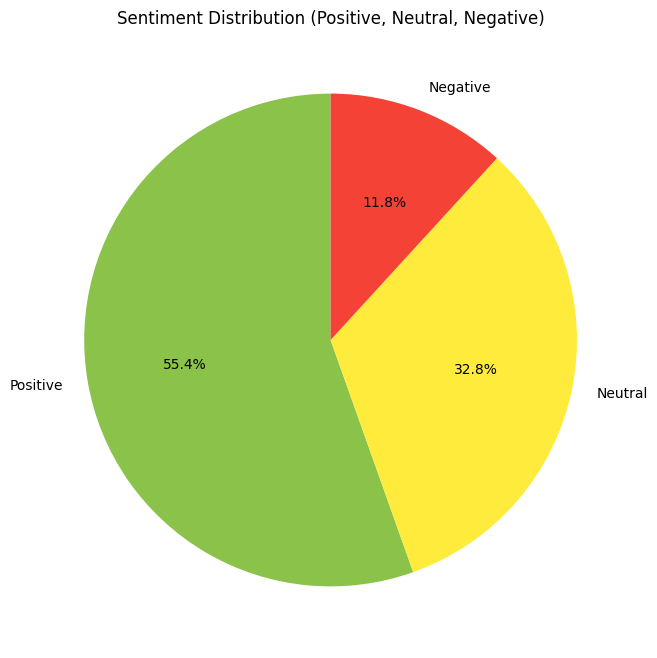

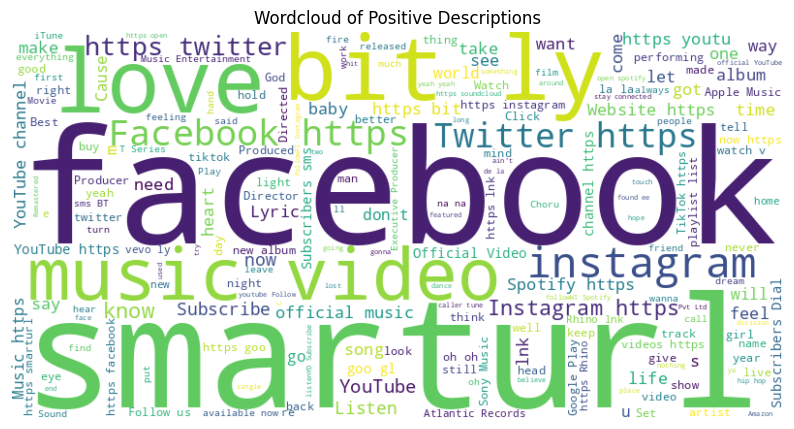

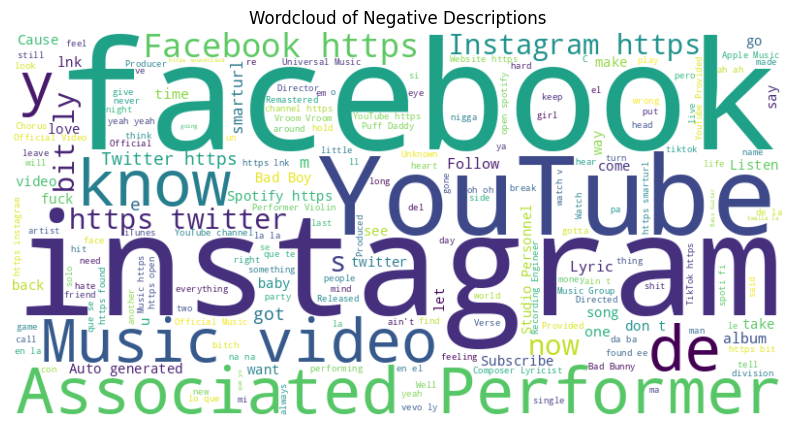

<ipython-input-1-95f3034901d3>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_word_freq.keys()), y=list(positive_word_freq.values()), palette="Greens_d")


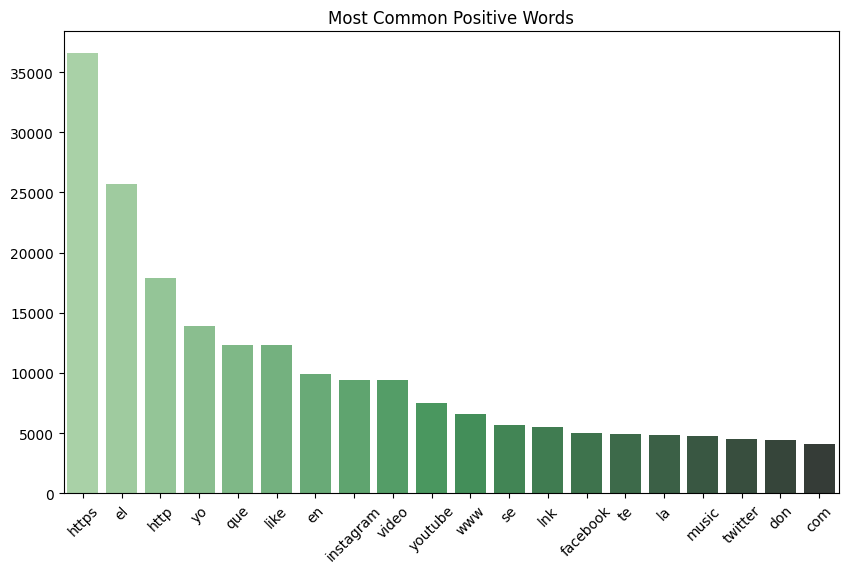

<ipython-input-1-95f3034901d3>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(negative_word_freq.keys()), y=list(negative_word_freq.values()), palette="Reds_d")


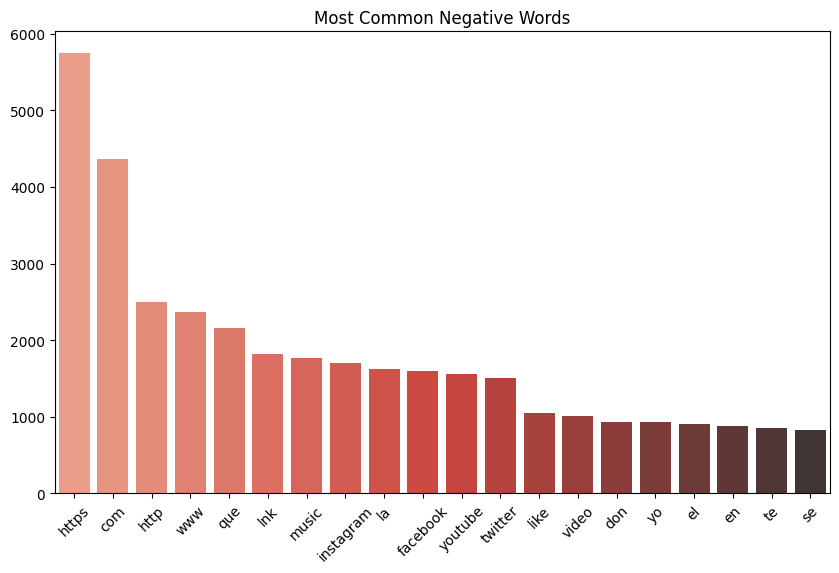

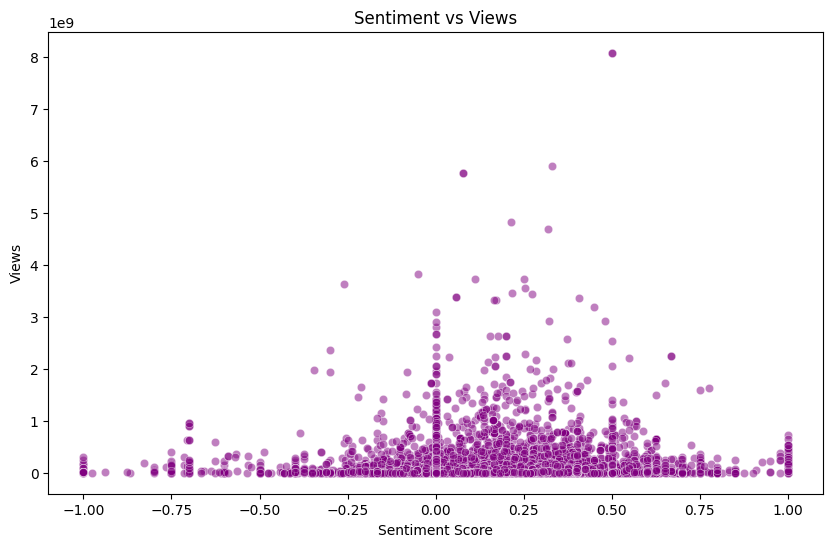

<ipython-input-1-95f3034901d3>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cumulative Sentiment"] = df_filtered["Sentiment"].cumsum()


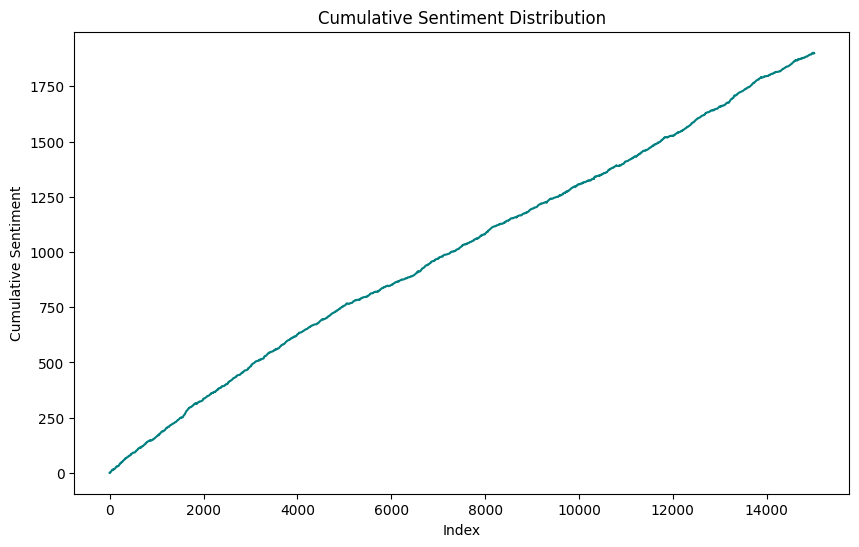

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
import numpy as np

# Load the dataset
df = pd.read_csv("/content/Spotify_Youtube.csv")

# Drop rows with missing descriptions
df_filtered = df.dropna(subset=["Description"])

# Perform sentiment analysis
df_filtered["Sentiment"] = df_filtered["Description"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot 1: Histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["Sentiment"], bins=30, kde=True, color="skyblue")
plt.title("Histogram of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Boxplot of sentiment scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered["Sentiment"], color="lightgreen")
plt.title("Boxplot of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.show()

# Plot 3: Pie chart of sentiment distribution (positive, negative, neutral)
positive = len(df_filtered[df_filtered["Sentiment"] > 0])
neutral = len(df_filtered[df_filtered["Sentiment"] == 0])
negative = len(df_filtered[df_filtered["Sentiment"] < 0])

plt.figure(figsize=(8, 8))
plt.pie([positive, neutral, negative], labels=["Positive", "Neutral", "Negative"], autopct="%1.1f%%", startangle=90, colors=["#8BC34A", "#FFEB3B", "#F44336"])
plt.title("Sentiment Distribution (Positive, Neutral, Negative)")
plt.show()

# Plot 4: Wordcloud of positive descriptions
positive_desc = " ".join(df_filtered[df_filtered["Sentiment"] > 0]["Description"])
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_desc)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Positive Descriptions")
plt.show()

# Plot 5: Wordcloud of negative descriptions
negative_desc = " ".join(df_filtered[df_filtered["Sentiment"] < 0]["Description"])
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate(negative_desc)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Negative Descriptions")
plt.show()

# Plot 6: Bar chart of most common positive and negative words
from sklearn.feature_extraction.text import CountVectorizer

# Extract positive and negative words
vectorizer = CountVectorizer(stop_words="english", max_features=20)
positive_words = vectorizer.fit_transform(df_filtered[df_filtered["Sentiment"] > 0]["Description"]).toarray()
negative_words = vectorizer.fit_transform(df_filtered[df_filtered["Sentiment"] < 0]["Description"]).toarray()

positive_word_count = np.array(positive_words.sum(axis=0)).flatten()
negative_word_count = np.array(negative_words.sum(axis=0)).flatten()

positive_words = vectorizer.get_feature_names_out()
negative_words = vectorizer.get_feature_names_out()

# Bar chart for positive words
positive_word_freq = dict(zip(positive_words, positive_word_count))
positive_word_freq = dict(sorted(positive_word_freq.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(positive_word_freq.keys()), y=list(positive_word_freq.values()), palette="Greens_d")
plt.title("Most Common Positive Words")
plt.xticks(rotation=45)
plt.show()

# Bar chart for negative words
negative_word_freq = dict(zip(negative_words, negative_word_count))
negative_word_freq = dict(sorted(negative_word_freq.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(negative_word_freq.keys()), y=list(negative_word_freq.values()), palette="Reds_d")
plt.title("Most Common Negative Words")
plt.xticks(rotation=45)
plt.show()

# Plot 7: Sentiment vs Views (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered["Sentiment"], y=df_filtered["Views"], color="purple", alpha=0.5)
plt.title("Sentiment vs Views")
plt.xlabel("Sentiment Score")
plt.ylabel("Views")
plt.show()

# Plot 8: Cumulative sentiment distribution
df_filtered["Cumulative Sentiment"] = df_filtered["Sentiment"].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(df_filtered["Cumulative Sentiment"], color="teal")
plt.title("Cumulative Sentiment Distribution")
plt.xlabel("Index")
plt.ylabel("Cumulative Sentiment")
plt.show()